# ΕΙΔΙΚΟ ΘΕΜΑ

---
### Θεόκλητος Τσιφτσής 
#### ΑΕΜ: 03247

---
Install & Import Libraries

In [1]:
!pip install tensorflow numpy matplotlib pillow scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import shutil
import random
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Split the dataset into test and train folders

In [11]:
original_dataset = "../Dataset_original/"
train_dir = "../Dataset/train/"
test_dir = "../Dataset/test/"

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)

for folder in ['triangles', 'circles', 'squares']:
    os.makedirs(os.path.join(train_dir, folder), exist_ok=True)
    os.makedirs(os.path.join(test_dir, folder), exist_ok=True)

for shape in ['triangles', 'circles', 'squares']:
    shape_path = os.path.join(original_dataset, shape)
    images = os.listdir(shape_path)
    random.shuffle(images)
    test_count = int(len(images) * 0.1)

    for img in images[:test_count]:
        shutil.copy(os.path.join(shape_path, img),
                    os.path.join(test_dir, shape, img))

    for img in images[test_count:]:
        shutil.copy(os.path.join(shape_path, img),
                    os.path.join(train_dir, shape, img))

print("train and test split complete. Used 100 images per shape (90 train / 10 test)")

train and test split complete. Used 100 images per shape (90 train / 10 test)


### Model Training and Evaluation using a portion of the dataset for testing (10%)

In [12]:
image_size = (28, 28)
batch_size = 16
train_dir = '../Dataset/train/'
test_dir = '../Dataset/test/'

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

class_indices = train_generator.class_indices
label_map = {v: k for k, v in class_indices.items()}
print("Class Labels:", label_map)

# 2 convolutional, 2 pooling kai 2 dense layers mazi me 1 flatten layer
# kalo model gia mikres eikones (28x28)
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, validation_data=val_generator, epochs=10)

model.save("shape_classifier_model.h5")
np.save("label_map.npy", label_map)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

loss, accuracy = model.evaluate(test_generator)
print(f"Final Test Accuracy: {accuracy * 100:.2f}%")

Found 216 images belonging to 3 classes.
Found 54 images belonging to 3 classes.
Class Labels: {0: 'circles', 1: 'squares', 2: 'triangles'}
Epoch 1/10


c:\Users\teots\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\teots\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.3519 - loss: 1.1080 - val_accuracy: 0.3333 - val_loss: 1.1225
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3657 - loss: 1.1070 - val_accuracy: 0.4815 - val_loss: 1.1015
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5000 - loss: 1.0836 - val_accuracy: 0.5185 - val_loss: 1.0559
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5093 - loss: 1.0466 - val_accuracy: 0.5370 - val_loss: 1.0041
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5231 - loss: 0.9998 - val_accuracy: 0.4630 - val_loss: 0.9586
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5833 - loss: 0.9577 - val_accuracy: 0.6481 - val_loss: 0.9361
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5648 - loss: 0.8963 - val_accuracy: 0.5741 - val_loss: 0.8602
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6435 - loss: 0.8441 - val_accuracy: 0.6481 - val_loss: 0.

Found 30 images belonging to 3 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5000 - loss: 0.8437
Final Test Accuracy: 50.00%


### Final Evaluation and showing misclassifications for model using a portion of the dataset for testing (10%)

In [2]:
%matplotlib inline  

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

loss, accuracy = model.evaluate(test_generator)
print(f"Final Test Accuracy: {accuracy * 100:.2f}%")

test_generator.reset()
preds = model.predict(test_generator, verbose=1)

y_pred = np.argmax(preds, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

misclassified_indices = np.where(y_pred != y_true)[0]
print(f"\nMisclassified Samples: {len(misclassified_indices)}")

# code gia emfanish ton misclassified samples
for idx in misclassified_indices[:10]:
    img_path = test_generator.filepaths[idx]
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Pred: {class_labels[y_pred[idx]]} | True: {class_labels[y_true[idx]]}")
    plt.show()

NameError: name 'ImageDataGenerator' is not defined

### Model Training and Evaluation using Synthetic Data along with the old training Data

#### Code for synthetic data preprocessing

In [21]:
import os
import shutil
from tqdm import tqdm

def organize_synthetic_data():
    synthetic_data_path = "../SyntheticData_28x28"
    original_train_path = "../Dataset/train"
    combined_train_path = "../Dataset/train_with_synthetic"
    
    print(f"Source: {synthetic_data_path}")
    print(f"Destination: {combined_train_path}")
    
    if not os.path.exists(synthetic_data_path):
        print(f"Synthetic data folder not found at {synthetic_data_path}")
        return False
    
    if not os.path.exists(original_train_path):
        print(f"Original training folder not found at {original_train_path}")
        return False
    
    for folder in ['triangles', 'circles', 'squares']:
        os.makedirs(os.path.join(combined_train_path, folder), exist_ok=True)
    
    for shape in ['triangles', 'circles', 'squares']:
        src_folder = os.path.join(original_train_path, shape)
        dst_folder = os.path.join(combined_train_path, shape)
        
        if os.path.exists(src_folder):
            for filename in os.listdir(src_folder):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                    src_path = os.path.join(src_folder, filename)
                    dst_path = os.path.join(dst_folder, filename)
                    shutil.copy2(src_path, dst_path)
                    
    synthetic_counts = {'circles': 0, 'squares': 0, 'triangles': 0, 'unknown': 0}
    
    synthetic_images = []
    for root, dirs, files in os.walk(synthetic_data_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                synthetic_images.append(os.path.join(root, file))
    
    print(f"Found {len(synthetic_images)} synthetic images to organize")
    
    for img_path in tqdm(synthetic_images, desc="Organizing images"):
        filename = os.path.basename(img_path)
        
        if 'circle' in filename.lower():
            category = 'circles'
        elif 'square' in filename.lower():
            category = 'squares'
        elif 'triangle' in filename.lower():
            category = 'triangles'
        else:
            category = 'unknown'
            synthetic_counts['unknown'] += 1
            continue
        
        dst_folder = os.path.join(combined_train_path, category)
        dst_path = os.path.join(dst_folder, filename)
        
        try:
            shutil.copy2(img_path, dst_path)
            synthetic_counts[category] += 1
        except Exception as e:
            print(f"Error copying {filename}: {e}")
    
    for shape in ['triangles', 'circles', 'squares']:
        folder_path = os.path.join(combined_train_path, shape)
        if os.path.exists(folder_path):
            total_count = len([f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
            print(f"{shape}: {total_count} images (original + {synthetic_counts[shape]} synthetic)")
        else:
            print(f"{shape}: Folder not found")
    return True

organize_synthetic_data()

Source: ../SyntheticData_28x28
Destination: ../Dataset/train_with_synthetic
Found 60 synthetic images to organize


Organizing images: 100%|██████████| 60/60 [00:00<00:00, 335.17it/s]

triangles: 119 images (original + 20 synthetic)


circles: 120 images (original + 20 synthetic)
squares: 120 images (original + 20 synthetic)


True

In [ ]:
image_size = (28, 28)
batch_size = 16
train_dir_synth = '../Dataset/train_with_synthetic/'
test_dir = '../Dataset/test/'

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator_synth = datagen.flow_from_directory(
    train_dir_synth,
    target_size=image_size,
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator_synth = datagen.flow_from_directory(
    train_dir_synth,
    target_size=image_size,
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

class_indices_synth = train_generator_synth.class_indices
label_map_synth = {v: k for k, v in class_indices_synth.items()}
print("Class Labels (Synthetic):", label_map_synth)

synthetic_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

synthetic_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

synthetic_history = synthetic_model.fit(train_generator_synth, validation_data=val_generator_synth, epochs=10)

synthetic_model.save("shape_classifier_synthetic_model.h5")
np.save("label_map_synthetic.npy", label_map_synth)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

loss, accuracy = synthetic_model.evaluate(test_generator)
print(f"Final Test Accuracy (Synthetic Model): {accuracy * 100:.2f}%")

Found 288 images belonging to 3 classes.


Found 71 images belonging to 3 classes.
Class Labels (Synthetic): {0: 'circles', 1: 'squares', 2: 'triangles'}
Epoch 1/10


c:\Users\teots\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\teots\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.3611 - loss: 1.1148 - val_accuracy: 0.3803 - val_loss: 1.0966
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3299 - loss: 1.0964 - val_accuracy: 0.4930 - val_loss: 1.0766
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4896 - loss: 1.0695 - val_accuracy: 0.7465 - val_loss: 1.0340
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5556 - loss: 1.0194 - val_accuracy: 0.4648 - val_loss: 0.9772
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5764 - loss: 0.9631 - val_accuracy: 0.6338 - val_loss: 0.8723
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6111 - loss: 0.8591 - val_accuracy: 0.8028 - val_loss: 0.7269
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6806 - loss: 0.7785 - val_accuracy: 0.7746 - val_loss: 0.7161
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6979 - loss: 0.7242 - val_accuracy: 0.8028 - val_loss: 0.

Found 30 images belonging to 3 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8667 - loss: 0.5006
Final Test Accuracy (Synthetic Model): 86.67%


Found 30 images belonging to 3 classes.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8667 - loss: 0.5006
Final Test Accuracy (Synthetic Model): 86.67%


c:\Users\teots\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

Classification Report (Synthetic Model):

              precision    recall  f1-score   support

     circles       1.00      0.70      0.82        10
     squares       0.90      0.90      0.90        10
   triangles       0.77      1.00      0.87        10

    accuracy                           0.87        30
   macro avg       0.89      0.87      0.86        30
weighted avg       0.89      0.87      0.86        30


Misclassified Samples: 4


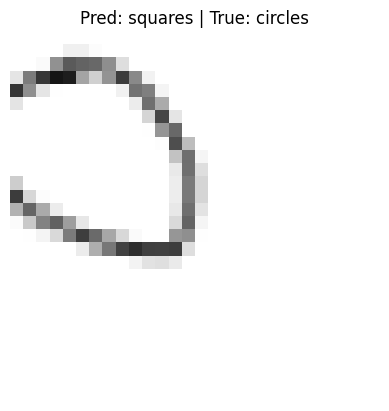

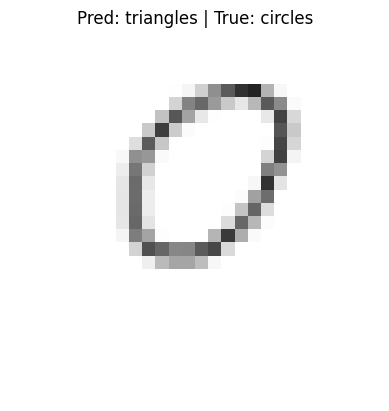

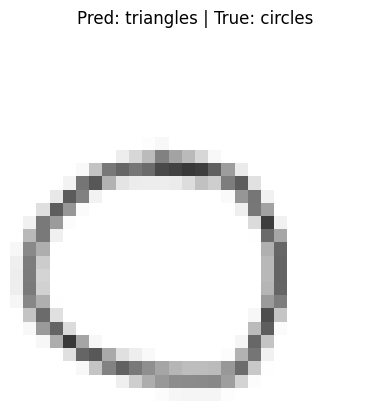

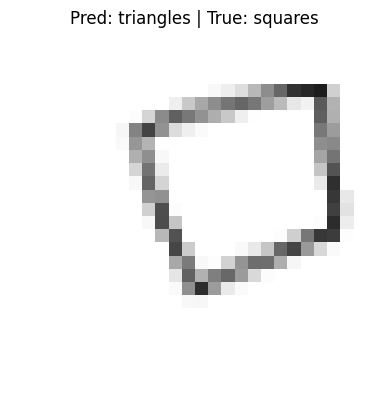

In [17]:
%matplotlib inline  

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

loss, accuracy = synthetic_model.evaluate(test_generator)
print(f"Final Test Accuracy (Synthetic Model): {accuracy * 100:.2f}%")

test_generator.reset()
preds = synthetic_model.predict(test_generator, verbose=1)

y_pred = np.argmax(preds, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("\nClassification Report (Synthetic Model):\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

misclassified_indices = np.where(y_pred != y_true)[0]
print(f"\nMisclassified Samples: {len(misclassified_indices)}")

for idx in misclassified_indices[:10]:
    img_path = test_generator.filepaths[idx]
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Pred: {class_labels[y_pred[idx]]} | True: {class_labels[y_true[idx]]}")
    plt.show()